# Исследование и анализ данных интернет-магазина "Стримчик".

 Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Импорт библиотек


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
#импорт библиотек

## Импорт данных и их общая информация.

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
df.shape

(16715, 11)

In [6]:
df.duplicated().sum()
#сумма явных дубликатов

0

In [7]:
df.isna().sum()
#проверка пропусков

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [8]:
df['Platform'].value_counts()
#Смотрим список платформ, на количество уникальных имен

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [9]:
df['Genre'].value_counts()
#Смотрим список жанров, на количество уникальных имен

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

**Вывод**:
Импортировали данные, в датафрейм df. Явных дубликатов не имеется , есть пропуски в столбцах 'Year_of_Release' , 'Critic_Score', 'User_Score', 'Rating'. Надо будет иззменить тип данных в "year_of_release" и "user_score".


## Предобработка данных.

In [10]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Замена названия столбцов, на нижний регистр.

In [11]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Меняем тип данных в столбце "year_of_release", потому что год имеет целое число.

### Работа с пропусками.

In [12]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
df = df.dropna(subset=['name'])

In [14]:
df[df['year_of_release'].isna()].head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,<NA>,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [15]:
df.query('name == "FIFA Soccer 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


In [16]:
# жизненный срок платформы

years_of_life = df.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

# years_of_life.sort_values(by = 'years_of_life', ascending = False)

,min,max,years_of_life
platform,,,
2600,1980,1989,9
3DO,1994,1995,1
3DS,2011,2016,5
DC,1998,2008,10
DS,1985,2013,28
GB,1988,2001,13
GBA,2000,2007,7
GC,2001,2007,6
GEN,1990,1994,4


In [17]:
df= df.dropna(subset=['year_of_release'])
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Удалили пропуски в столбце years_of_release.

In [18]:
df['year_of_release'].isna().sum()

0

In [19]:
# жизненный срок платформы

years_of_life = df.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

# years_of_life.sort_values(by = 'years_of_life', ascending = False)

,min,max,years_of_life
platform,,,
2600,1980,1989,9
3DO,1994,1995,1
3DS,2011,2016,5
DC,1998,2008,10
DS,1985,2013,28
GB,1988,2001,13
GBA,2000,2007,7
GC,2001,2007,6
GEN,1990,1994,4


Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. TBD - значит что подлежит определению, значит еще предстоит, получается можно заменить значение на NaN.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


In [21]:
df.loc[df['user_score']=='tbd', 'user_score'] = np.nan

In [22]:
df['user_score'].isna().sum()

8981

In [23]:
df['user_score'] = df['user_score'].astype('float')

In [24]:
df.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

### Сумма продаж во всех регионах.

In [25]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [26]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [27]:
df['rating'] = df['rating'].fillna('unknown')

**Вывод**:
* Привели к нижнему регистру название столбцов.
* Изменили тип данных в столбцах с датой релиза и в пользовательской оценке.
* Удалили пропуски в дате релиза
* Заменили пропуски в рейтинг на 'unknown'
* Добавили столбец с суммой продаж по всем регионам.

In [28]:
# check
df['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

## Исследовательский анализ данных.

###  Выпуск игр в разные годы.

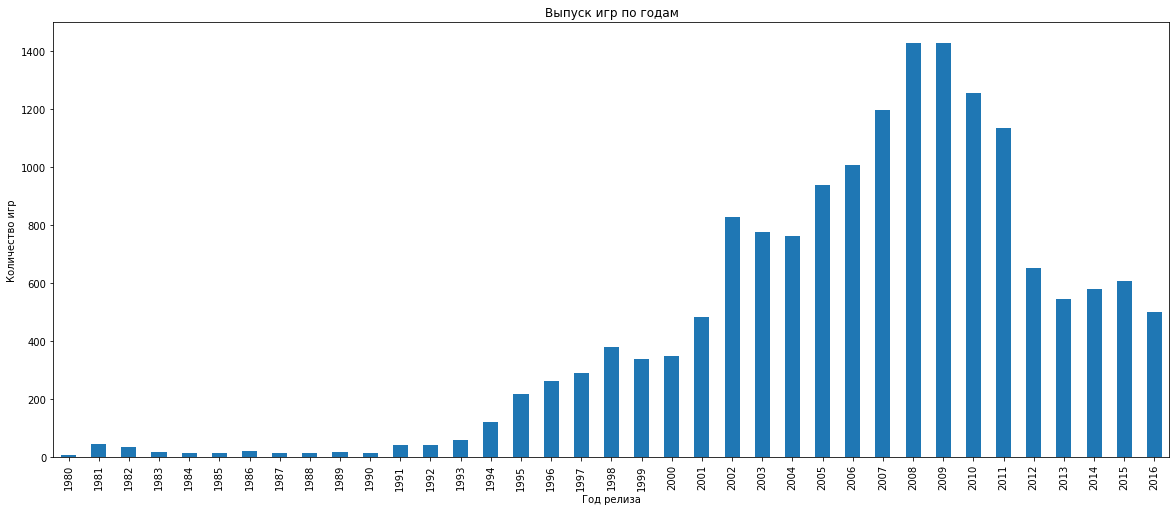

In [29]:
games_years = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_years = games_years.reset_index()
games_years.plot(x='year_of_release', y='name', kind='bar',figsize=(20,8), legend=False)
plt.title('Выпуск игр по годам')
plt.xlabel('Год релиза')
plt.ylabel('Количество игр')
plt.show()


На графике видно, что рост выпущенных игр начинается с 1991 года и достигает пика в 2008, далее уже идет спад.

### Продажи по платформам.

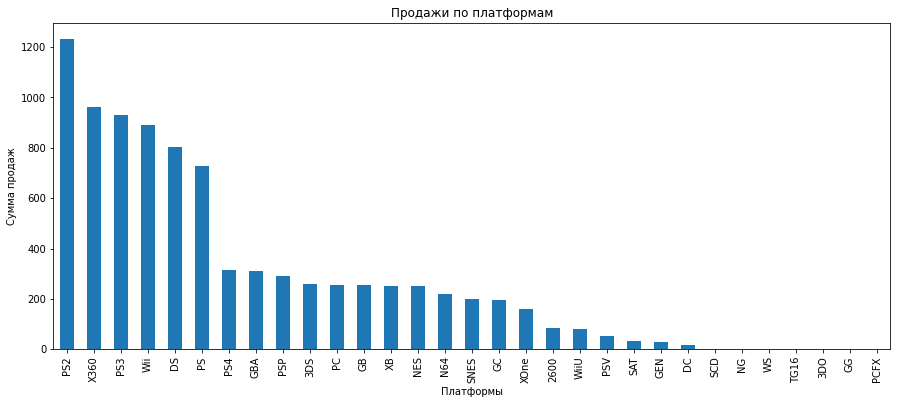

In [30]:
platform_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platform_sales = platform_sales.reset_index()
platform_sales = platform_sales.sort_values(by='total_sales',ascending=False)
platform_sales.plot(x='platform', y='total_sales', kind='bar',figsize=(15,6), legend=False)
plt.xlabel('Платформы')
plt.ylabel('Сумма продаж')
plt.title('Продажи по платформам')
plt.show()

На графике видны, что самые большие продажи у PS2, X360 , PS3, Wii, DS, PS.

In [31]:
df2010 = df.query('year_of_release > 2010')
top_platforms = df2010.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(6)
top_platforms = top_platforms.reset_index()
top_platforms

,platform,total_sales
0,PS3,445.57
1,X360,380.38
2,PS4,314.14
3,3DS,257.81
4,XOne,159.32
5,PC,97.68


In [32]:
def total_year_sales_platform(name, data):
    x = data[data['platform']==name]
    y = x.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    return y

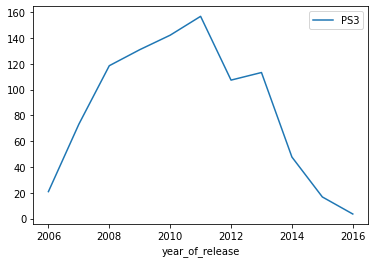

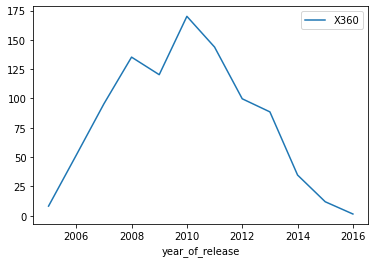

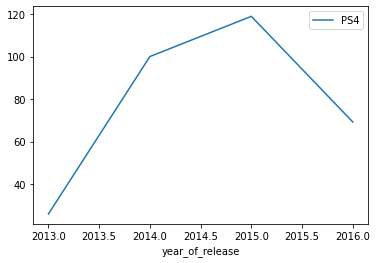

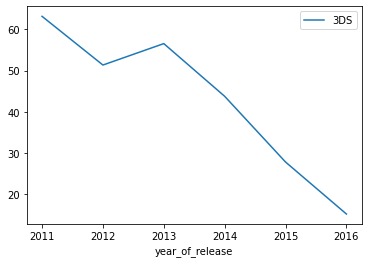

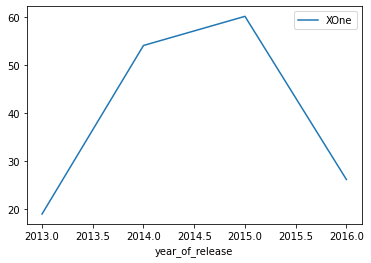

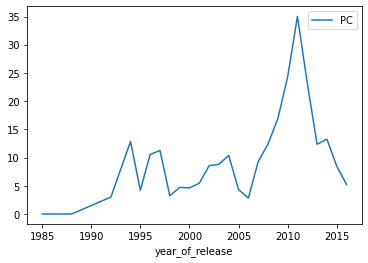

In [33]:
for i in list(top_platforms['platform']):
    total_year_sales_platform(i,df).plot(y='total_sales',label=i)
    
    

На графиках видно , что игры обычно выходят в течении 10ти лет, изменим функцию, чтобы выдавала последние 5 лет. Возьмём за актуальный период с 2005ого года и не будем рассматривать значения платформы PS, ибо не подойдет под актуальный период.

In [34]:
def total_year_sales_platform_change(name, data):
    gg = data[(data['platform']==name) & (data['year_of_release']>2010)]
    wp = gg.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    return wp

In [35]:
top_platforms = top_platforms.head(5)
top_platforms

,platform,total_sales
0,PS3,445.57
1,X360,380.38
2,PS4,314.14
3,3DS,257.81
4,XOne,159.32


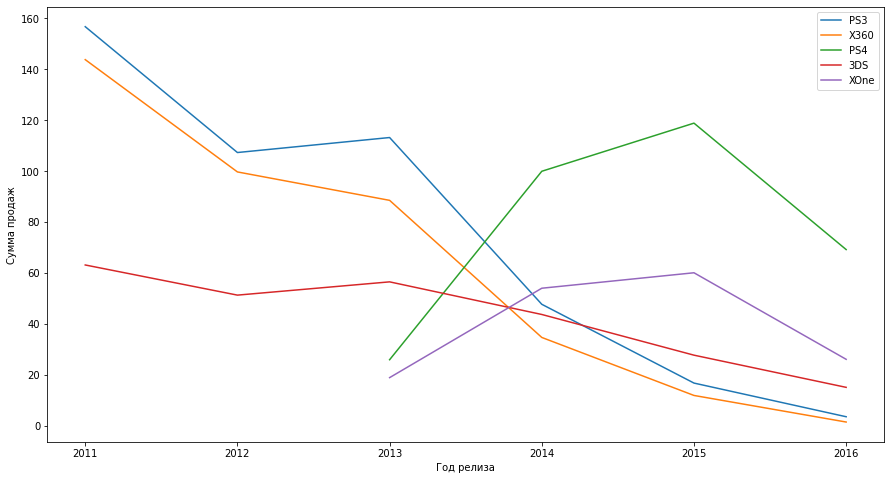

In [36]:
plt.figure(figsize=(15,8))
plt.xlabel('Год релиза')
plt.ylabel('Сумма продаж')
for i in list(top_platforms['platform']):
    sns.lineplot(data=total_year_sales_platform_change(i,df)['total_sales'],label=i)


Лидируют по продажа это PS и XBOX. Самый большой пик приходился на Wii, но по графику видно , что после резкого скачка произошел резкий спад. В общем платформы 'живут' около 10ти лет. Поэтому взяли за актуальный период 5 лет.

In [37]:
top_platforms_data = df[df['platform'].isin(['PS3','X360','PS4','3DS','XOne'])]

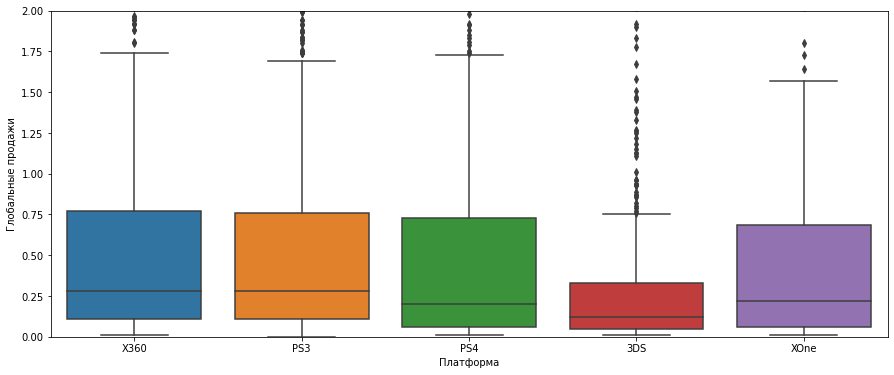

In [38]:
plt.figure(figsize=(15,6))
sns.boxplot(data=top_platforms_data,x='platform', y ='total_sales')
plt.ylim(0, 2)
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.show()

### Отзывы и продажи.

Рассмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [39]:
sony_ps3_data = df.query('platform=="PS3"')

In [40]:
sony_ps3_data['user_score'].corr(sony_ps3_data['total_sales'])


0.12841562938563006

In [41]:
sony_ps3_data['critic_score'].corr(sony_ps3_data['total_sales'])

0.4327589578997135

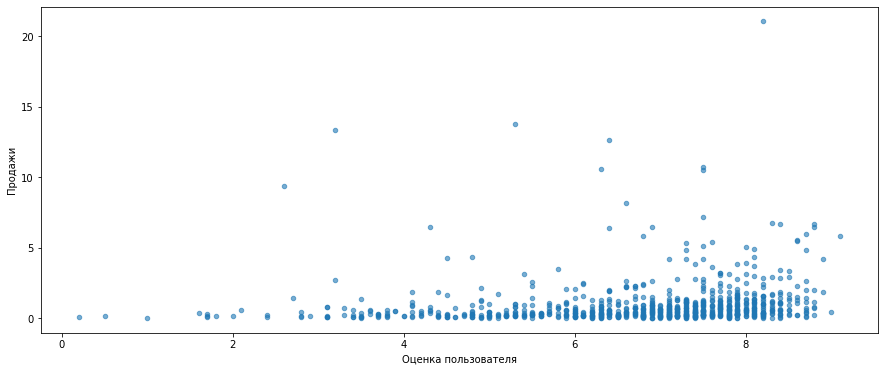

In [42]:
sony_ps3_data.plot(x='user_score',y='total_sales', kind='scatter', alpha=0.6 , figsize=(15,6))
plt.xlabel('Оценка пользователя')
plt.ylabel('Продажи')
plt.show()

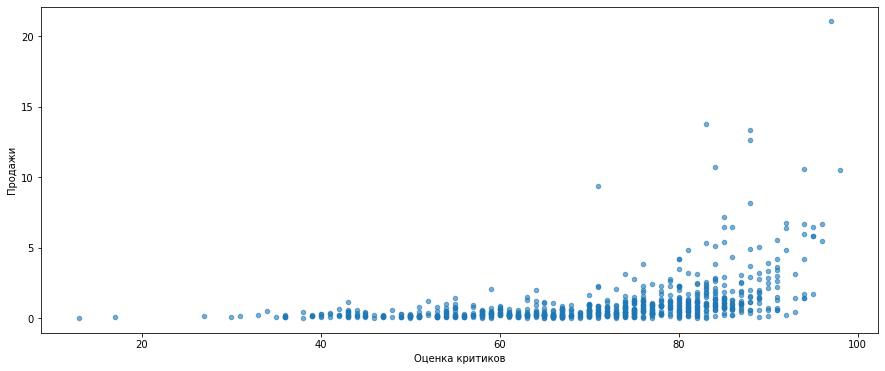

In [43]:
sony_ps3_data.plot(x='critic_score',y='total_sales', kind='scatter', alpha=0.6 , figsize=(15,6))
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

Соотнесем выводы с продажами игр на других платформах.

In [44]:
def score_conclusion(platform_name):
    platform_data = df[df['platform']==platform_name]
    fig, ax = plt.subplots(1,2, figsize=(15,6))
    platform_data.plot(x='user_score', y ='total_sales', kind='scatter', figsize=(15,6), alpha=0.6, ax=ax[0])
    platform_data.plot(x='critic_score', y ='total_sales', kind='scatter', figsize=(15,6),alpha=0.6, ax=ax[1])
    fig.suptitle(platform_name)
    plt.show()
    corr_user = platform_data['user_score'].corr(platform_data['total_sales'])
    corr_critic = platform_data['critic_score'].corr(platform_data['total_sales'])
    print('Корреляция между отзывами пользователей и игровой платформой:', corr_user)
    print('Корреляция между отзывами критиков и игровой платформой:', corr_critic)
    

In [45]:
top_platforms_data['platform'].unique()

array(['X360', 'PS3', 'PS4', '3DS', 'XOne'], dtype=object)

In [46]:
top_list = ['X360', 'PS3', 'PS4', '3DS', 'XOne']

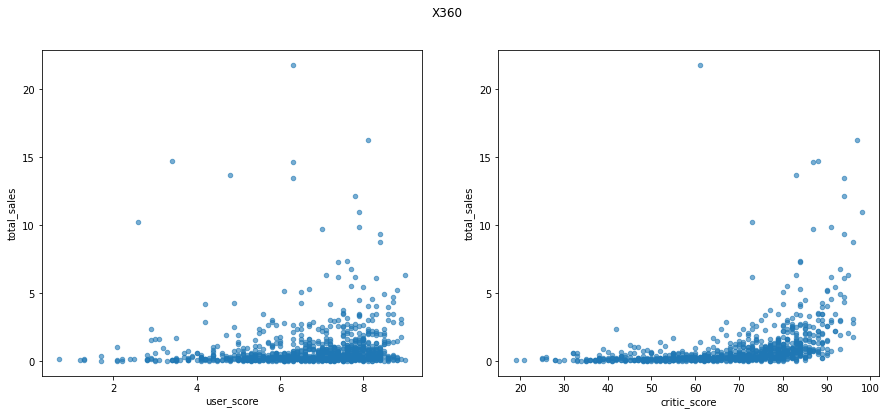

Корреляция между отзывами пользователей и игровой платформой: 0.11418661214018049
Корреляция между отзывами критиков и игровой платформой: 0.39286589254006954


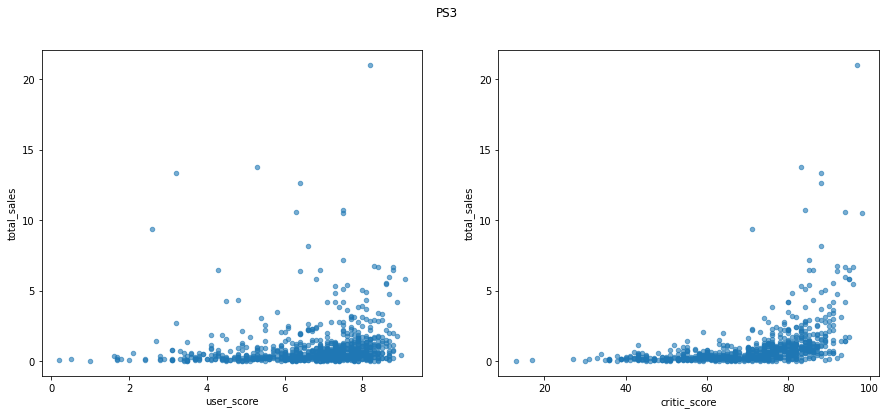

Корреляция между отзывами пользователей и игровой платформой: 0.12841562938563006
Корреляция между отзывами критиков и игровой платформой: 0.4327589578997135


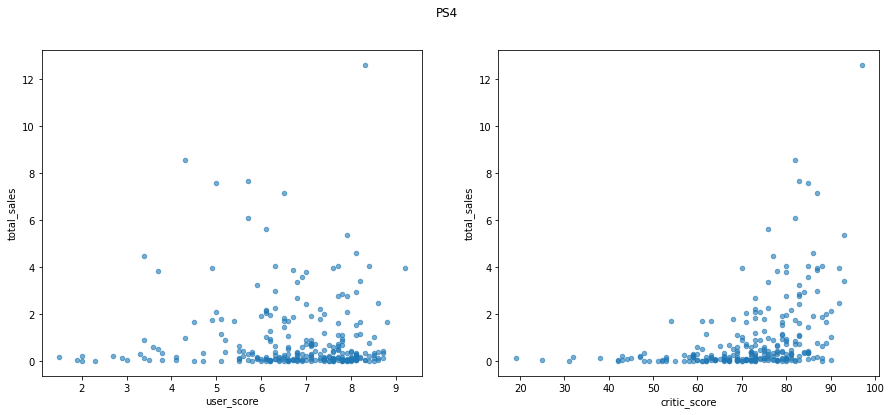

Корреляция между отзывами пользователей и игровой платформой: -0.031957110204556376
Корреляция между отзывами критиков и игровой платформой: 0.40656790206178095


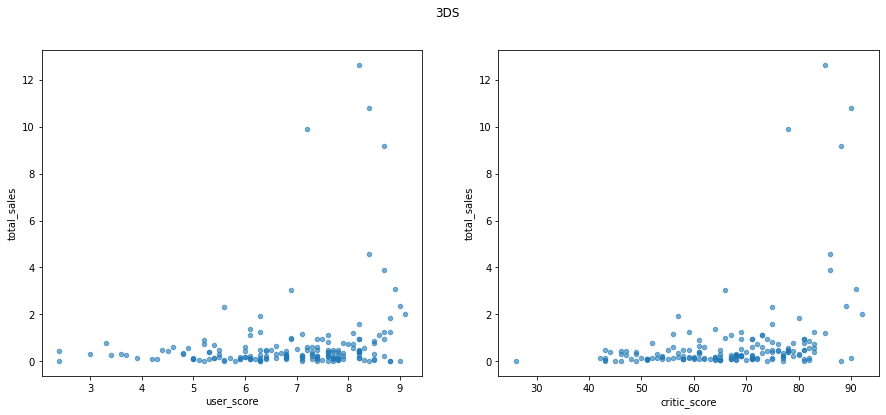

Корреляция между отзывами пользователей и игровой платформой: 0.22207843643390882
Корреляция между отзывами критиков и игровой платформой: 0.3487397305984834


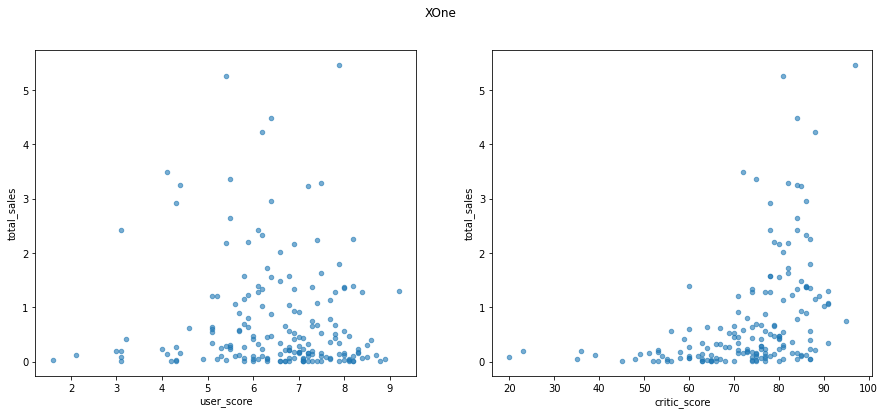

Корреляция между отзывами пользователей и игровой платформой: -0.06892505328279414
Корреляция между отзывами критиков и игровой платформой: 0.4169983280084017


In [47]:
for i in top_list:
    score_conclusion(i)

Корреляция между отзывами критиков и продажами на игровых платформах больше чем между отзывами пользователей.

### Жанры.

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [48]:
genre_sales = df2010.pivot_table(index="genre", values='total_sales',aggfunc='sum')
genre_sales = genre_sales.reset_index()
genre_sales = genre_sales.sort_values(by='total_sales',ascending=False)
genre_sales

,genre,total_sales
0,Action,557.80
8,Shooter,402.91
7,Role-Playing,245.63
10,Sports,237.15
3,Misc,139.42
4,Platform,88.68
6,Racing,88.31
2,Fighting,66.90
9,Simulation,50.26
1,Adventure,45.04


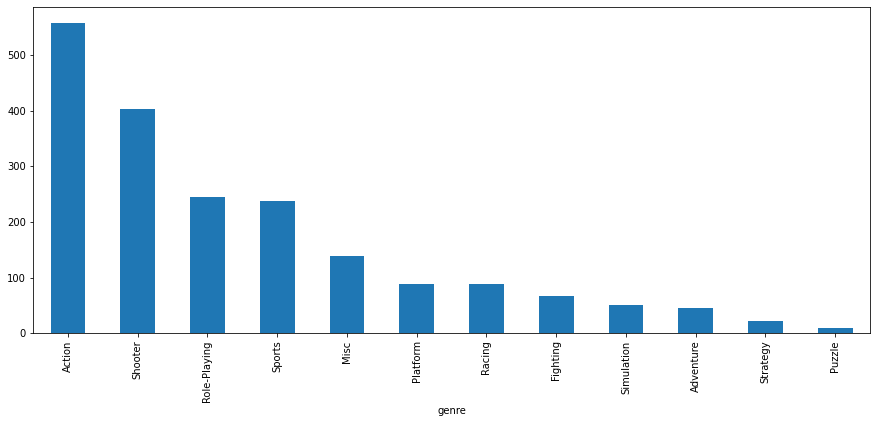

In [49]:
genre_sales.plot(x='genre',y='total_sales', kind='bar',figsize=(15,6),legend=False)
plt.show()

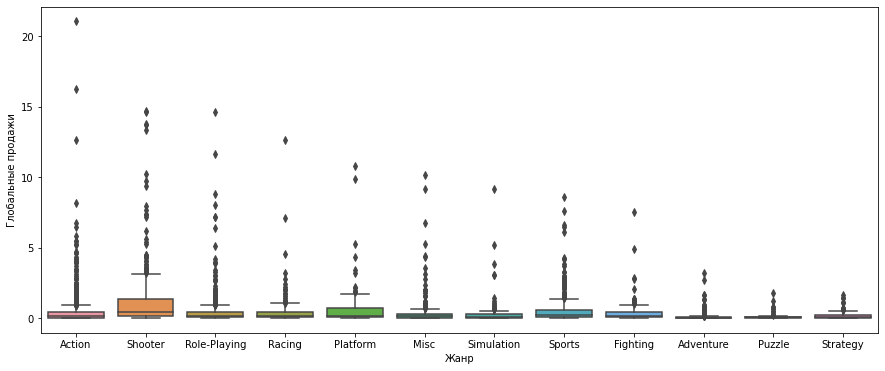

In [50]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df2010,x='genre', y ='total_sales')
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи')
plt.show()

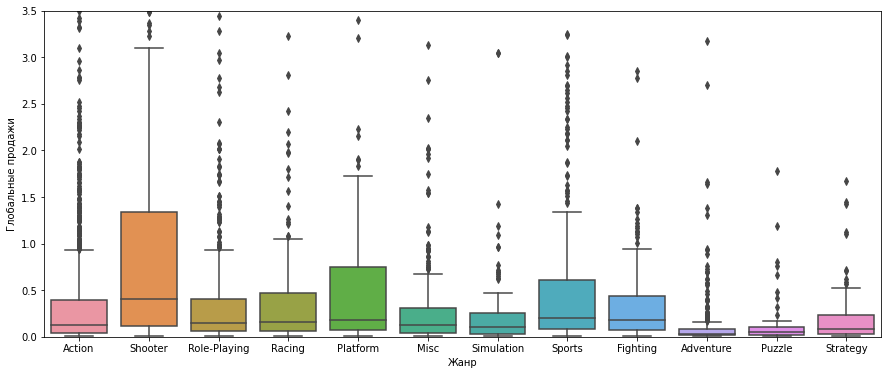

In [51]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df2010,x='genre', y ='total_sales')
plt.ylim(0, 3.5)
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи')
plt.show()

**Вывод**
* Самое большое количество продаж игр приходится на платформу PS3
* Топ 5 платформ по продажам это PS3 , X360, PS4, 3DS , Xone, PS
* В среднем платформы популярны около 10ти лет.
* Оценка критиков больше зависит , чем оценка пользователя при покупке игр.
* Топ жанр по продажам это экшн, самый низкий результат приходится на пазл.

## Портрет пользователя каждого региона.

Самые популярные платформы (топ-5). Опишем различия в долях продаж.
Самые популярные жанры (топ-5). Поясним разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Рассмотрим регион NA.

In [52]:
platform_na = df2010.pivot_table(index='platform', values='na_sales', aggfunc=('sum'))
platform_na = platform_na.reset_index()
platform_na = platform_na.sort_values(by='na_sales', ascending=False).head(5)
platform_na

,platform,na_sales
10,X360,226.80
4,PS3,168.26
5,PS4,108.74
11,XOne,93.12
0,3DS,82.65


In [53]:
genre_na = df2010.pivot_table(index='genre', values='na_sales', aggfunc=('sum'))
genre_na = genre_na.reset_index()
genre_na = genre_na.sort_values(by='na_sales', ascending=False).head(5)
genre_na

,genre,na_sales
0,Action,230.92
8,Shooter,194.43
10,Sports,108.70
7,Role-Playing,83.78
3,Misc,69.69


In [54]:
rating_na = df2010.pivot_table(index='rating', values='na_sales', aggfunc=('sum'))
rating_na = rating_na.reset_index()
rating_na = rating_na.sort_values(by='na_sales', ascending=False).head(5)
rating_na

,rating,na_sales
3,M,308.45
0,E,170.17
6,unknown,123.69
1,E10+,117.72
5,T,109.31


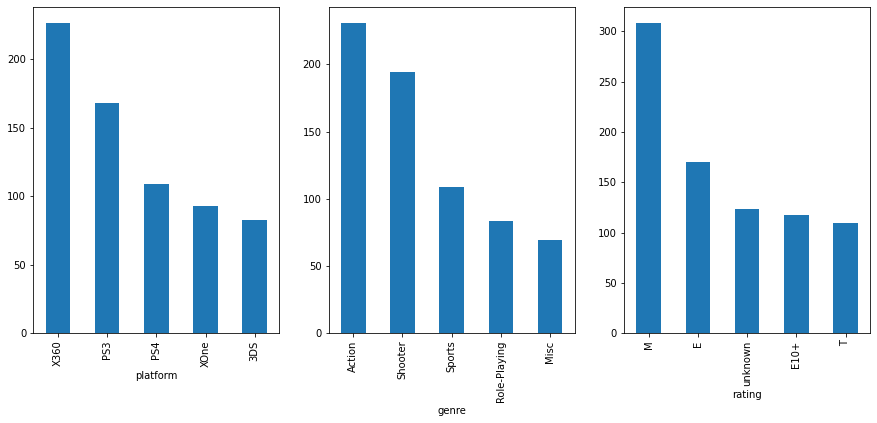

In [55]:
fig, ax = plt.subplots(1,3, figsize=(15,6))
platform_na.plot(x='platform', y='na_sales', kind='bar', legend=False, ax=ax[0])
genre_na.plot(x='genre', y='na_sales', kind='bar', legend=False, ax=ax[1])
rating_na.plot(x='rating', y='na_sales', kind='bar', legend=False, ax=ax[2])
plt.show()

Видим, что популяные продажи в этом региона приходятся на X360. Экшн самый популярный жанр в NA.  Самый популярный рейтинг 17+, 

In [56]:
platform_eu = df2010.pivot_table(index='platform', values='eu_sales', aggfunc=('sum'))
platform_eu = platform_eu.reset_index()
platform_eu = platform_eu.sort_values(by='eu_sales', ascending=False).head(5)
platform_eu

,platform,eu_sales
4,PS3,163.10
5,PS4,141.09
10,X360,117.10
0,3DS,61.27
2,PC,56.70


In [57]:
genre_eu = df2010.pivot_table(index='genre', values='eu_sales', aggfunc=('sum'))
genre_eu = genre_eu.reset_index()
genre_eu = genre_eu.sort_values(by='eu_sales', ascending=False).head(5)
genre_eu

,genre,eu_sales
0,Action,199.12
8,Shooter,148.02
10,Sports,88.48
7,Role-Playing,62.30
6,Racing,40.58


In [58]:
rating_eu = df2010.pivot_table(index='rating', values='eu_sales', aggfunc=('sum'))
rating_eu = rating_eu.reset_index()
rating_eu = rating_eu.sort_values(by='eu_sales', ascending=False).head(5)
rating_eu

,rating,eu_sales
3,M,250.26
0,E,141.73
6,unknown,116.61
5,T,83.16
1,E10+,78.00


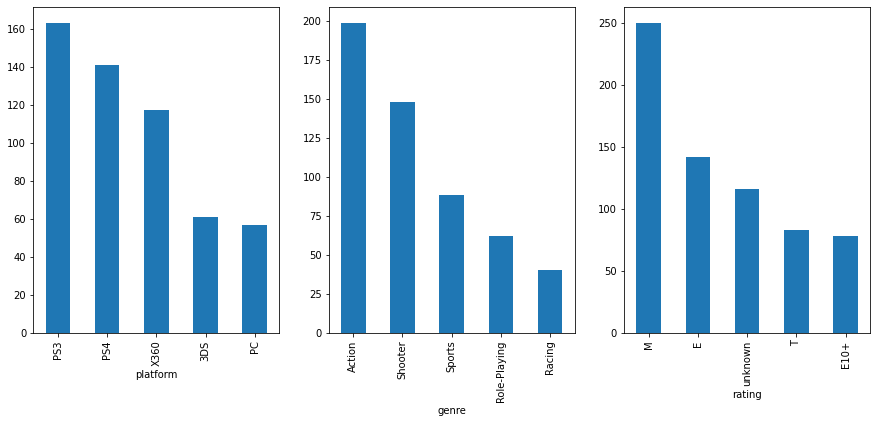

In [59]:
fig, ax = plt.subplots(1,3, figsize=(15,6))
platform_eu.plot(x='platform', y='eu_sales', kind='bar', legend=False, ax=ax[0])
genre_eu.plot(x='genre', y='eu_sales', kind='bar', legend=False, ax=ax[1])
rating_eu.plot(x='rating', y='eu_sales', kind='bar', legend=False, ax=ax[2])
plt.show()

В Европе хбокс отстает от sony playstation по продажам. В топ жанре и рейтинге остаются все те же , что и в NA.

In [60]:
platform_jp = df2010.pivot_table(index='platform', values='jp_sales', aggfunc=('sum'))
platform_jp = platform_jp.reset_index()
platform_jp = platform_jp.sort_values(by='jp_sales', ascending=False).head(5)
platform_jp

,platform,jp_sales
0,3DS,100.62
4,PS3,49.39
6,PSP,24.04
7,PSV,21.84
5,PS4,15.96


In [61]:
genre_jp = df2010.pivot_table(index='genre', values='jp_sales', aggfunc=('sum'))
genre_jp = genre_jp.reset_index()
genre_jp = genre_jp.sort_values(by='jp_sales', ascending=False).head(5)
genre_jp

,genre,jp_sales
7,Role-Playing,79.87
0,Action,63.62
3,Misc,17.60
2,Fighting,12.38
4,Platform,12.13


In [62]:
rating_jp = df2010.pivot_table(index='rating', values='jp_sales', aggfunc=('sum'))
rating_jp = rating_jp.reset_index()
rating_jp = rating_jp.sort_values(by='jp_sales', ascending=False).head(5)
rating_jp

,rating,jp_sales
6,unknown,138.21
0,E,36.68
5,T,33.39
3,M,26.14
1,E10+,11.23


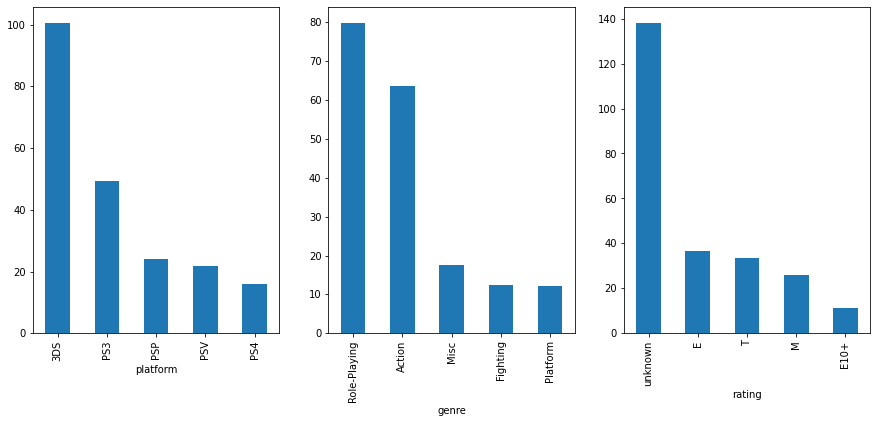

In [63]:
fig, ax = plt.subplots(1,3, figsize=(15,6))
platform_jp.plot(x='platform', y='jp_sales', kind='bar', legend=False, ax=ax[0])
genre_jp.plot(x='genre', y='jp_sales', kind='bar', legend=False, ax=ax[1])
rating_jp.plot(x='rating', y='jp_sales', kind='bar', legend=False, ax=ax[2])
plt.show()

Лидирует по плафтормам в Японии, это DS , ролевой жанр сильно отрывается по сравнению с другими.

Чтобы результат был более актуальным возьмём данные за последние два года.

In [64]:
df15_16 = df.query('year_of_release>=2015')
platform_na2 = df15_16.pivot_table(index='platform', values='na_sales', aggfunc=('sum'))
platform_na2 = platform_na2.reset_index()
platform_na2 = platform_na2.sort_values(by='na_sales', ascending=False).head(5)
platform_na2

,platform,na_sales
3,PS4,63.86
9,XOne,50.30
0,3DS,10.31
7,WiiU,8.86
8,X360,8.05


In [65]:
genre_na2 = df15_16.pivot_table(index='genre', values='na_sales', aggfunc=('sum'))
genre_na2 = genre_na2.reset_index()
genre_na2 = genre_na2.sort_values(by='na_sales', ascending=False).head(5)
genre_na2

,genre,na_sales
8,Shooter,48.18
0,Action,33.68
10,Sports,26.31
7,Role-Playing,19.82
3,Misc,5.58


In [66]:
rating_na2 = df15_16.pivot_table(index='rating', values='na_sales', aggfunc=('sum'))
rating_na2 = rating_na2.reset_index()
rating_na2 = rating_na2.sort_values(by='na_sales', ascending=False).head(5)
rating_na2

,rating,na_sales
2,M,47.03
4,unknown,37.44
0,E,26.59
3,T,22.86
1,E10+,17.87


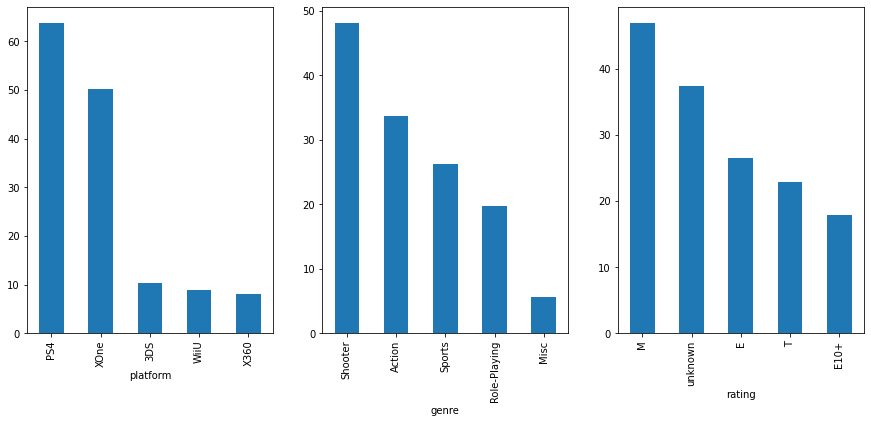

In [67]:
fig, ax = plt.subplots(1,3, figsize=(15,6))
platform_na2.plot(x='platform', y='na_sales', kind='bar', legend=False, ax=ax[0])
genre_na2.plot(x='genre', y='na_sales', kind='bar', legend=False, ax=ax[1])
rating_na2.plot(x='rating', y='na_sales', kind='bar', legend=False, ax=ax[2])
plt.show()

In [68]:
platform_eu2 = df15_16.pivot_table(index='platform', values='eu_sales', aggfunc=('sum'))
platform_eu2 = platform_eu2.reset_index()
platform_eu2 = platform_eu2.sort_values(by='eu_sales', ascending=False).head(5)
platform_eu2

,platform,eu_sales
3,PS4,83.54
9,XOne,28.10
1,PC,9.10
0,3DS,7.39
2,PS3,7.30


In [69]:
genre_eu2 = df15_16.pivot_table(index='genre', values='eu_sales', aggfunc=('sum'))
genre_eu2 = genre_eu2.reset_index()
genre_eu2 = genre_eu2.sort_values(by='eu_sales', ascending=False).head(5)
genre_eu2


,genre,eu_sales
8,Shooter,40.28
0,Action,34.82
10,Sports,27.82
7,Role-Playing,17.21
6,Racing,6.52


In [70]:
rating_eu2 = df15_16.pivot_table(index='rating', values='eu_sales', aggfunc=('sum'))
rating_eu2 = rating_eu2.reset_index()
rating_eu2 = rating_eu2.sort_values(by='eu_sales', ascending=False).head(5)
rating_eu2

,rating,eu_sales
2,M,45.54
4,unknown,35.71
0,E,34.83
3,T,20.32
1,E10+,11.54


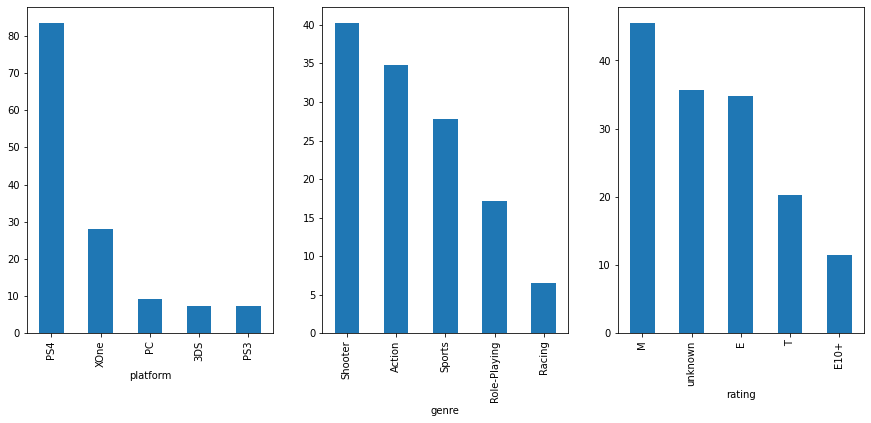

In [71]:
fig, ax = plt.subplots(1,3, figsize=(15,6))
platform_eu2.plot(x='platform', y='eu_sales', kind='bar', legend=False, ax=ax[0])
genre_eu2.plot(x='genre', y='eu_sales', kind='bar', legend=False, ax=ax[1])
rating_eu2.plot(x='rating', y='eu_sales', kind='bar', legend=False, ax=ax[2])
plt.show()

In [72]:
platform_jp2 = df15_16.pivot_table(index='platform', values='jp_sales', aggfunc=('sum'))
platform_jp2 = platform_jp2.reset_index()
platform_jp2 = platform_jp2.sort_values(by='jp_sales', ascending=False).head(5)
platform_jp2



,platform,jp_sales
0,3DS,23.55
3,PS4,12.05
5,PSV,8.41
2,PS3,4.97
7,WiiU,4.12


In [73]:
genre_jp2 = df15_16.pivot_table(index='genre', values='jp_sales', aggfunc=('sum'))
genre_jp2 = genre_jp2.reset_index()
genre_jp2 = genre_jp2.sort_values(by='jp_sales', ascending=False).head(5)
genre_jp2

,genre,jp_sales
0,Action,23.05
7,Role-Playing,13.41
8,Shooter,3.79
3,Misc,3.19
1,Adventure,2.22


In [74]:
rating_jp2 = df15_16.pivot_table(index='rating', values='jp_sales', aggfunc=('sum'))
rating_jp2 = rating_jp2.reset_index()
rating_jp2 = rating_jp2.sort_values(by='jp_sales', ascending=False).head(5)
rating_jp2

,rating,jp_sales
4,unknown,32.89
3,T,7.70
0,E,5.25
2,M,4.29
1,E10+,3.27


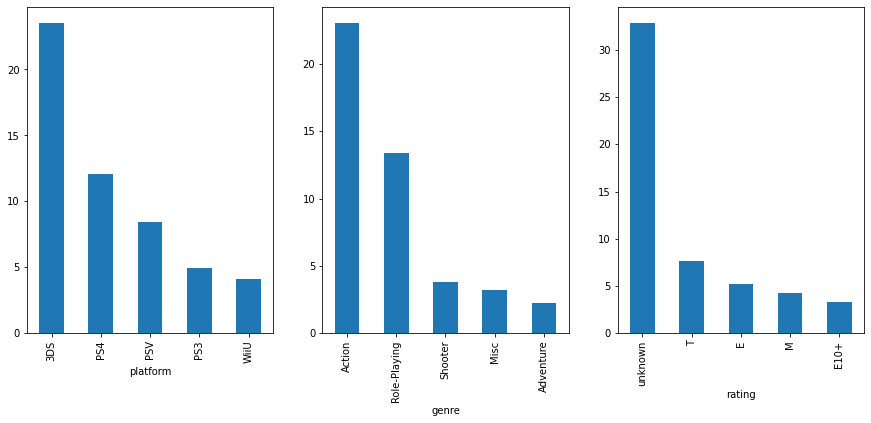

In [75]:
fig, ax = plt.subplots(1,3, figsize=(15,6))
platform_jp2.plot(x='platform', y='jp_sales', kind='bar', legend=False, ax=ax[0])
genre_jp2.plot(x='genre', y='jp_sales', kind='bar', legend=False, ax=ax[1])
rating_jp2.plot(x='rating', y='jp_sales', kind='bar', legend=False, ax=ax[2])
plt.show()

**Вывод:**
* Самые популярные платформы за актуальный период в NA: Это 'X360', 'PS3', 'PS4', 'XOne', '3DS' , популярные жанры это - 'Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc' , популярные рейтинги - 'M', 'E', 'unknown', 'E10+', 'T'.
* Самые популярные платформы за актуальный период в EU: это 'PS3', 'PS4', 'X360', '3DS', 'PC' , популярные жанры это - 'Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing' , популярные рейтинги - 'M', 'E', 'unknown', 'T', 'E10+.
* Самые популярные платформы за актуальный период в Японик: это - '3DS', 'PS3', 'PSP', 'PSV', 'PS4' , жанры - 'Role-Playing', 'Action', 'Misc', 'Fighting', 'Platform' , рейтинги 'unknown', 'E', 'T', 'M', 'E10+'

Если рассматривать прогноз на 2017ый по последнему году, то самая актуальная платформа будет PS4, жанр Shooter, а рейтинг 17+


## Проверка гипотез.

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Нулевая гипотеза : Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативниая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [76]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [77]:
x_one = df[(df['platform']=='XOne') & (df['year_of_release']>2010)]['user_score']
pc = df[(df['platform']=='PC') & (df['year_of_release']>2010)]['user_score']

In [78]:
np.var(df[df['platform']=='XOne']['user_score'])

1.8965188383045526

In [79]:
np.var(df[df['platform']=='PC']['user_score'])

2.346112819613175

In [80]:
alpha = .01
results = st.ttest_ind(x_one.dropna(),pc.dropna(), equal_var=False)
print('p-значение', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 0.6130712247638477
Не получилось отвергнуть нулевую гипотезу


p-значение равна ~ 0.613, не получилось отвергнуть нулевую гипотезу

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [82]:
action = df[(df['genre']=='Action') & (df['year_of_release']>2006)]['user_score']
sports = df[(df['genre']=='Sports') & (df['year_of_release']>2006)]['user_score']

In [83]:
np.var(df[df['genre']=='Action']['user_score'])

2.026364874182172

In [84]:
np.var(df[df['genre']=='Sports']['user_score'])

2.620629303904546

In [85]:
alpha = .01
results = st.ttest_ind(action.dropna(),sports.dropna(), equal_var=False)
print('p-значение', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 4.540665510055229e-11
Отвергаем нулевую гипотезу


**Вывод:**
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; Нулевую гипотезу не получилось отвергнуть
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Отвергли нулевую гипотезу.

## Общий вывод.

* После импорта данных, подготовили данные к анализу
* Привели к нижнему регистру название столбцов, изменили типы данных у некоторых столбцов
* Удалили пропуски в столбцах year_of_release , заменили аббревиатуру "tbd" на значения NaN
* Ознакомились с динамикой продаж игр за все годы и поняли, что игры на платформах в среднем продаются 10 лет.
* Взяли актуальный период 5 лет
* Выявили топ платформ по продажам, ими оказались PS3, X360, PS4, 3DS, XOne
* Самым популярном жанром за актуальный периоод был Action
* Самый популярный жанр за последние два года стал Shooter
* Самая популярная платформа за последние два года PS4
* Самый популярный рейтинг за последние два года это 17+


**Составили портреты каждого региона за 2015-2016 год**
* Регион NA: популярные платформы PS4, XOne, 3DS, WiiU , X360, популярные жанры Shooter, Action, Sports, Role-Playing, Misc , топ рейтинг 17+ , для всех , 13+
* Регион EU: популярные платформы PS4, XOne, PS,  3DS, PS3, популярные жанры  Shooter, Action , Sports , Role-Playing, Racing, топ рейтинг 17+ , для всех , 13+
* Регион JP: популярные платформы 3DS, PS4, PSV, PS3, WiiU, популярные жанры Action , Role-playing, Shooter, Misc, Adventure, топ рейтинг 17+ , для всех , 13+


Исходя из данных наиболее продаваемый жанр в 2017 возможен Shooter, платформа PS4